In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import calendar

import xgboost as xgb
from sklearn import svm

pd.set_option('display.max_columns', None)

In [2]:
# Cárrega de la base de dades
db_vols = pd.read_csv('H:\_vertex\_formacio\_python - cibernarium\_12\DelayedFlights.csv')

# Donar estils a les taules
db_vols.style.set_table_styles([{'selector' : '','props' : [('border','5px solid green')]}])

db_vols.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Faig una cópia per evitar de reexecutar tantes vegades 
vols = db_vols.copy()

In [4]:
# Eliminar columna anomenada Unnamed: 0
vols = vols.rename(columns={"Unnamed: 0": "id"})

# Fixar com a index la columna id
vols = vols.set_index('id')

# Elimina la columna index
#vols.drop('index', axis='columns', inplace=True)

vols.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Mida del dataframe
vols.shape

(1936758, 29)

In [6]:
# Fer cop d'ull als valors NULL
vols.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
# Elimino les columnes amb tants valors NULL
vols = vols.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)

In [8]:
# Comprobació de que efectivamnent s'han eliminat aquestes columnes
vols.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 5
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay             8387
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
CancellationCode        0
Diverted                0
dtype: int64

In [9]:
# Potser fora convenient eliminar les files amb dades amb valor NULL
vols = vols.dropna(axis=0, how='any')
vols.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

In [10]:
# Mida nova del dataframe
vols.shape

(1928368, 24)

In [11]:
# Estadístics de resum de cada columna categórica
vols.describe(include='object')

,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1928368,1928368,1928368,1928368,1928368
unique,20,5360,303,302,1
top,WN,N325SW,ATL,ORD,N
freq,376201,961,131213,108265,1928368


In [12]:
# Estadístics de resum de cada columna numérica
vols.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,1928368.0,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.0,1928368.0
mean,2008.0,6.11,15.75,3.98,1518.65,1467.72,1610.24,1634.20,2184.29,133.31,134.20,108.28,42.20,43.09,764.95,6.81,18.22,0.0,0.0
std,0.0,3.48,8.78,2.00,450.44,424.73,548.00,464.63,1944.45,72.06,71.23,68.64,56.78,53.27,573.89,5.27,14.31,0.0,0.0
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.0,0.0
25%,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,611.00,80.00,82.00,58.00,9.00,12.00,338.00,4.00,10.00,0.0,0.0
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,116.00,90.00,24.00,24.00,606.00,6.00,14.00,0.0,0.0
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3423.00,165.00,165.00,137.00,56.00,53.00,997.00,8.00,21.00,0.0,0.0
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9741.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,0.0,0.0


In [13]:
# Converteixo a categórica la variable número de vol
vols['FlightNum'] = vols['FlightNum'].apply(str)

In [14]:
# Estadístics de resum de cada columna categórica de nou
vols.describe(include='object')

,UniqueCarrier,FlightNum,TailNum,Origin,Dest,CancellationCode
count,1928368,1928368,1928368,1928368,1928368,1928368
unique,20,7498,5360,303,302,1
top,WN,16,N325SW,ATL,ORD,N
freq,376201,1575,961,131213,108265,1928368


In [15]:
# Elimino columnes per tenir només un valor
vols = vols.drop(['CancellationCode', 'Year', 'Cancelled', 'Diverted'], axis=1)

In [16]:
# Elimino més variables que considero no interessen o que tenen molts valors únics sdiferents (categories)
vols = vols.drop(['CRSDepTime', 'CRSArrTime', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'TailNum', 'DayofMonth','FlightNum'], axis=1)

In [17]:
# Elimino columna per estar relacionada linealment amb altres
vols = vols.drop(['CRSElapsedTime'], axis=1)

In [18]:
# Convertim la columna Month de numeric a categoric de text 
mesos = []
for i in vols['Month']:
     mesos.append(calendar.month_name[i])
        
vols['Month'] = mesos

In [19]:
# Convertim la columna DayOfWeek numeric a categoric de text
dies_setmana = []
for i in vols['DayOfWeek']:
     dies_setmana.append(calendar.day_name[i-1])
        
vols['DayOfWeek'] = dies_setmana

In [20]:
# Estadístics de resum de cada columna categórica de nou
vols.describe(include='object')

,Month,DayOfWeek,UniqueCarrier,Origin,Dest
count,1928368,1928368,1928368,1928368,1928368
unique,12,7,20,303,302
top,December,Friday,WN,ATL,ORD
freq,201508,321982,376201,131213,108265


In [21]:
# Estadístics de resum de cada columna numérica de nou
vols.describe().round(2)

,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut
count,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00,1928368.00
mean,108.28,42.20,43.09,764.95,6.81,18.22
std,68.64,56.78,53.27,573.89,5.27,14.31
min,0.00,-109.00,6.00,11.00,0.00,0.00
25%,58.00,9.00,12.00,338.00,4.00,10.00
50%,90.00,24.00,24.00,606.00,6.00,14.00
75%,137.00,56.00,53.00,997.00,8.00,21.00
max,1091.00,2461.00,2467.00,4962.00,240.00,422.00


In [22]:
# Aspecte final del dataframe
vols.head()

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
0,January,Thursday,WN,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0
1,January,Thursday,WN,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0
2,January,Thursday,WN,76.0,14.0,8.0,IND,BWI,515,3.0,17.0
4,January,Thursday,WN,77.0,34.0,34.0,IND,BWI,515,3.0,10.0
5,January,Thursday,WN,87.0,11.0,25.0,IND,JAX,688,4.0,10.0


In [23]:
# Mida final del dataframe
vols.shape

(1928368, 11)

In [24]:
# Per tal d'estalviar temps de calcul primer agafo una mostra aleatoria simple
mostra = 15000
vols_mostra = vols.sample(mostra,random_state=56789)

In [25]:
# Faig una estandarització d'atributs de tipus numéric
columnes_a_estandaritzar = ['Distance', 'AirTime', 'ArrDelay', 'DepDelay', 'TaxiIn', 'TaxiOut']
estandaritzador = StandardScaler()
vols_mostra[columnes_a_estandaritzar] = estandaritzador.fit_transform(vols_mostra[columnes_a_estandaritzar].values)

In [26]:
# Aspecte final del dataframe
vols_mostra.head()

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220
5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162
437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844
440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959
6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959


In [27]:
# Mida final del dataframe
vols_mostra.shape

(15000, 11)

In [28]:
# Es creen les variables dummy per a les categòriques
vols_mostra_dummies = pd.get_dummies(vols_mostra)
vols_mostra_dummies.head()

,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACT,Origin_ACV,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLT,Origin_CMH,Origin_CMI,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_IPL,Origin_ISP,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIT,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_SUN,Origin_SWF,Origin_SYR,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_XNA,Origin_YAK,Origin_YUM,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACT,Dest_ACV,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BQK,Dest_BQN,Dest_BRO,Dest_BRW,Dest_BTM,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,

In [29]:
# Mida final del dataframe
vols_mostra_dummies.shape

(15000, 584)

## Nivell 1

- Exercici 1

    Classifica els diferents vols utilitzant l'algorisme de K-means.

In [30]:
# Ús del Analisi de components principals (ACP) per tal de millorar l'ús del següent classificador
acp = PCA(random_state=1234)
acp.fit(vols_mostra_dummies)

PCA(random_state=1234)

In [31]:
# Quantes components hi han
print(acp.n_components_)

584


In [32]:
# Acumulat de variància explicada
variansa_total = sum(acp.explained_variance_)
variansa_total

10.642549832211005

In [33]:
# Percentatge de variància explicada de cada component i ordenada de més a menys
variansa_explicada = sorted((acp.explained_variance_/variansa_total)*100, reverse=True)
variansa_explicada[0:10]

[19.752117542449103,
 18.68027160278969,
 9.36817224341813,
 8.644892039070049,
 1.5951518173491523,
 1.5565567138041527,
 1.4373080561516558,
 1.3880482496522488,
 1.3285646675878324,
 1.2462073072465614]

In [34]:
components_total = len(acp.explained_variance_)

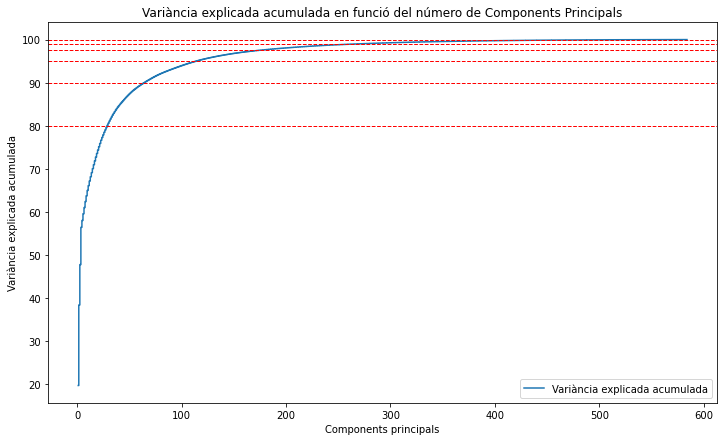

In [35]:
# Per tal de graficar la variància explicada acumulada primer la calculem així
variansa_acumulada = np.cumsum(variansa_explicada)

plt.figure(figsize=(12, 7))
plt.step(range(1, components_total+1), variansa_acumulada, where='mid',label='Variància explicada acumulada')
plt.title('Variància explicada acumulada en funció del número de Components Principals')
plt.xlabel('Components principals')
plt.ylabel('Variància explicada acumulada')
plt.axhline(y = 100, color='r', linestyle='--', linewidth=1)
plt.axhline(y = 99, color='r', linestyle='--', linewidth=1)
plt.axhline(y = 97.5, color='r', linestyle='--', linewidth=1)
plt.axhline(y = 95, color='r', linestyle='--', linewidth=1)
plt.axhline(y = 90, color='r', linestyle='--', linewidth=1)
plt.axhline(y = 80, color='r', linestyle='--', linewidth=1)
plt.legend(loc='best')
plt.show()

In [36]:
# Nombre de compoments per arribar al % de variancia explicada corresponent
llista_pctg_variansa_explicada_acumulada = [99,97.5,95,90,80,70,60,50,30]
for pctg in llista_pctg_variansa_explicada_acumulada:
    print('{} components explicarien un {}% de la variància explicada.'.format(np.argmax(variansa_acumulada>pctg)+1,pctg))

269 components explicarien un 99% de la variància explicada.
174 components explicarien un 97.5% de la variància explicada.
114 components explicarien un 95% de la variància explicada.
65 components explicarien un 90% de la variància explicada.
29 components explicarien un 80% de la variància explicada.
15 components explicarien un 70% de la variància explicada.
7 components explicarien un 60% de la variància explicada.
4 components explicarien un 50% de la variància explicada.
2 components explicarien un 30% de la variància explicada.


In [37]:
# Usarem l'ACP per a amb els components que facin flata per tal de tenir un 90% de la variància explicada
pctg = 90
x_components_estudiar = np.argmax(variansa_acumulada>pctg)+1

acp_x_components = PCA(n_components = x_components_estudiar, random_state=56789)
acp_x_components.fit(vols_mostra_dummies)
vols_mostra_dummies_acp_x_components = acp_x_components.transform(vols_mostra_dummies)

In [38]:
# Usarem un métode anomenat del colze per obtenir el nombre de clústers idoni per a kMeans 
kmeans_parametres = {"init": "k-means++", "n_init": 10, "max_iter": 500, "random_state": 56789,}

# Creem llista de la suma de quadrats per a cada nombre de clusters
kmeans_sse = []
for clusters in range(1, x_components_estudiar):
    kmeans = KMeans(n_clusters=clusters, **kmeans_parametres)
    kmeans.fit(vols_mostra_dummies_acp_x_components)
    kmeans_sse.append(kmeans.inertia_)

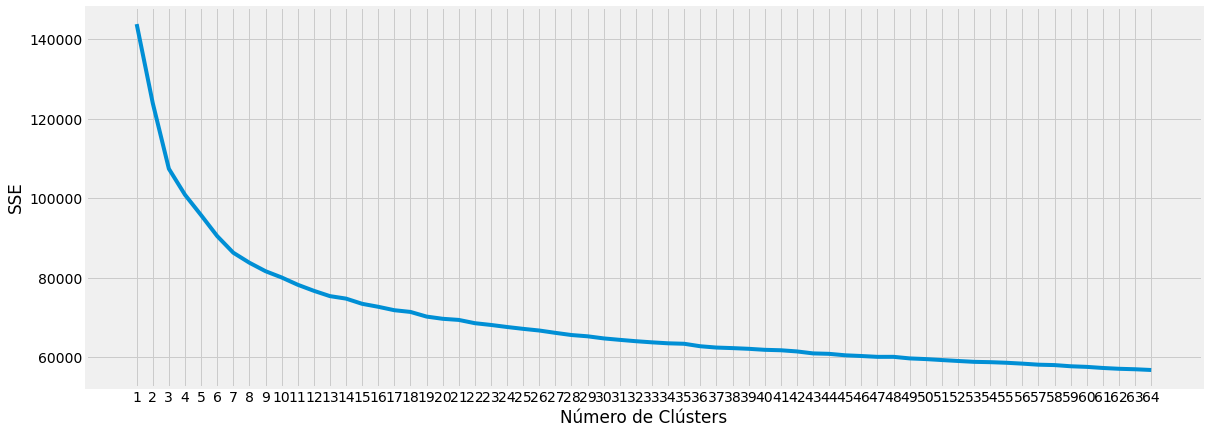

In [39]:
# Plotegem gràfic per tal de veure la forma de la corba
plt.figure(figsize=(20, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, x_components_estudiar), kmeans_sse)
plt.xticks(range(1, x_components_estudiar))
plt.ylabel("SSE")
plt.xlabel("Número de Clústers")
plt.show()

In [40]:
# Ús del métode del colze 
colze = KneeLocator(range(1, x_components_estudiar), kmeans_sse, curve="convex", direction="decreasing")
print('El número de clústers idoni és de:', colze.elbow)

El número de clústers idoni és de: 12


In [41]:
# Ara si anem amb el k-means i amb el nostre de clusters idoni
kmeans_parametres = {"init": "k-means++", "n_init": 10, "max_iter": 500, "random_state": 56789,}
kmeans_clusters = KMeans(n_clusters=colze.elbow, **kmeans_parametres)
vols_mostra_dummies_acp_x_components_kmeans = kmeans_clusters.fit(vols_mostra_dummies_acp_x_components)

In [42]:
# S'agafen les dues primeres components principals
acp_kmeans = pd.DataFrame(vols_mostra_dummies_acp_x_components[:,:2],columns=["acp_component_01", "acp_component_02"],)
acp_kmeans["cluster"] = (vols_mostra_dummies_acp_x_components_kmeans.labels_)+1
display(acp_kmeans.head())
display(acp_kmeans.shape)

,acp_component_01,acp_component_02,cluster
0,3.270193,-1.247583,6
1,-0.756612,-0.051908,1
2,-0.049035,0.680069,3
3,-0.404026,0.006501,9
4,0.357600,1.646457,2


(15000, 3)

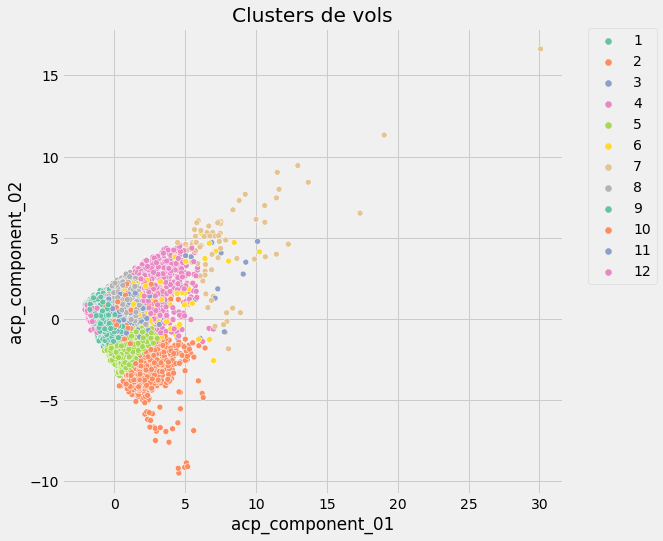

In [43]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(x="acp_component_01",y="acp_component_02",s=35,data=acp_kmeans,hue="cluster",palette="Set2",)

scat.set_title("Clusters de vols")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [44]:
# Creem un nou índex per tal de poder concatenar els ACP i clusters
display(vols_mostra.head())
vols_mostra_final = vols_mostra.reset_index('id')
display(vols_mostra_final.head())
display(vols_mostra_final.shape)

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220
5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162
437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844
440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959
6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959


,id,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220
1,5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162
2,437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844
3,440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959
4,6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959


(15000, 12)

In [45]:
# Materialització de la unió de taules
vols_mostra_final = vols_mostra_final.join(acp_kmeans)
display(vols_mostra_final.head())
display(vols_mostra_final.shape)

,id,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
0,6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220,3.270193,-1.247583,6
1,5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162,-0.756612,-0.051908,1
2,437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844,-0.049035,0.680069,3
3,440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959,-0.404026,0.006501,9
4,6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959,0.357600,1.646457,2


(15000, 15)

In [46]:
# Faig cop d'ull als estadístics de cada clúster
for cluster in range(1,colze.elbow+1):
    display(vols_mostra_final[vols_mostra_final['cluster'] == cluster].describe())

,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,3.991000e+03,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3991.0
mean,3.321127e+06,-0.700646,-0.419917,-0.398002,-0.692742,-0.178070,-0.202976,-1.042595,0.522455,1.0
std,2.021968e+06,0.304539,0.282529,0.269875,0.292181,0.502884,0.435268,0.387271,0.421869,0.0
min,9.483400e+04,-1.400404,-1.305230,-0.701085,-1.276848,-1.245151,-1.231283,-2.045045,-0.436439,1.0
25%,1.554215e+06,-0.932440,-0.635827,-0.625383,-0.938918,-0.514228,-0.516080,-1.317930,0.202915,1.0
50%,3.266489e+06,-0.713082,-0.459668,-0.473979,-0.711297,-0.331498,-0.301520,-1.058709,0.530986,1.0
75%,4.966755e+06,-0.442541,-0.230662,-0.246873,-0.441654,0.033964,0.056081,-0.762480,0.821695,1.0
max,7.009031e+06,0.178974,0.509204,0.472296,-0.040690,1.495809,1.271925,0.019850,1.814147,1.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.0
mean,3.613030e+06,-0.081352,0.080562,-0.098719,-0.101068,2.750406,-0.138776,0.444190,0.143398,2.0
std,2.102091e+06,0.690884,0.625834,0.600863,0.710026,1.346194,0.603701,0.982094,0.962147,0.0
min,4.782000e+04,-1.371156,-1.058608,-0.701085,-1.213814,1.313078,-1.016722,-1.355463,-4.269714,2.0
25%,1.692224e+06,-0.625339,-0.389205,-0.587532,-0.650890,1.678539,-0.587601,-0.254055,-0.409498,2.0
50%,3.500874e+06,-0.142751,-0.054503,-0.322575,-0.191271,2.226731,-0.301520,0.289748,0.201238,2.0
75%,5.522294e+06,0.325212,0.421125,0.226264,0.325254,3.323115,0.127602,0.940087,0.799688,2.0
max,7.006820e+06,3.030627,2.834498,2.421621,3.196781,8.256842,3.346012,4.514458,2.803129,2.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.047000e+03,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.0
mean,3.356839e+06,-0.182642,0.227872,-0.126596,-0.224705,-0.038466,1.784589,0.408759,0.382500,3.0
std,2.105519e+06,0.586804,0.533842,0.494706,0.572094,0.577527,0.765106,0.784567,0.778943,0.0
min,8.086000e+03,-1.298037,-0.882449,-0.701085,-1.213814,-0.879690,0.556723,-0.957629,-2.082350,3.0
25%,1.502696e+06,-0.618027,-0.160199,-0.511830,-0.655267,-0.514228,1.200405,-0.198130,-0.162848,3.0
50%,3.305131e+06,-0.230495,0.121655,-0.265798,-0.280568,-0.148767,1.558006,0.273056,0.389356,3.0
75%,4.979653e+06,0.178974,0.509204,0.131637,0.176425,0.216694,2.201688,0.893968,0.956088,3.0
max,7.007924e+06,1.802222,1.988936,1.740303,1.811795,2.226731,4.347295,3.558312,2.457883,3.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.757000e+03,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.0
mean,3.101118e+06,-0.633163,-0.439766,-0.396801,-0.605116,-0.453699,-0.586746,-1.215239,0.394248,4.0
std,2.076303e+06,0.307095,0.300495,0.296703,0.302128,0.326704,0.293672,0.396635,0.430885,0.0
min,7.900000e+01,-1.224917,-1.410925,-0.701085,-1.098253,-1.062420,-1.231283,-2.071820,-0.851299,4.0
25%,1.234840e+06,-0.873944,-0.653443,-0.625383,-0.833862,-0.696959,-0.802161,-1.520170,0.126788,4.0
50%,3.017660e+06,-0.698458,-0.512516,-0.492904,-0.683282,-0.514228,-0.659121,-1.265936,0.440614,4.0
75%,4.892707e+06,-0.435229,-0.265894,-0.246873,-0.397880,-0.331498,-0.444560,-0.967682,0.685372,4.0
max,6.736221e+06,0.339836,0.544436,0.756178,0.344514,1.313078,0.985844,0.034456,1.557556,4.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.0
mean,3.321712e+06,1.484119,-0.315795,-0.252341,1.510348,-0.045295,-0.132015,0.721860,-2.024666,5.0
std,2.046739e+06,0.403770,0.525696,0.498197,0.406619,0.562121,0.521678,0.658863,0.589950,0.0
min,8.280000e+02,0.690809,-1.340461,-0.701085,0.538868,-1.062420,-1.016722,-0.702513,-3.492529,5.0
25%,1.495530e+06,1.158773,-0.688674,-0.625383,1.197218,-0.514228,-0.516080,0.254719,-2.426338,5.0
50%,3.248951e+06,1.451250,-0.459668,-0.436128,1.465110,-0.148767,-0.230000,0.619857,-2.018282,5.0
75%,4.826817e+06,1.772975,-0.054503,-0.057618,1.743508,0.216694,0.127602,1.045618,-1.650329,5.0
max,7.008893e+06,2.738150,1.742314,1.645676,2.687260,2.226731,2.559290,3.379934,-0.390295,5.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.580000e+02,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,3.387328e+06,0.034771,1.804416,0.479962,-0.039438,0.356633,5.808933,2.971377,1.184637,6.0
std,1.849192e+06,0.917711,1.145739,1.051963,0.890709,1.421298,2.292835,1.659854,1.370798,0.0
min,3.385200e+04,-1.224917,0.121655,-0.701085,-1.213814,-0.879690,3.274492,0.459284,-2.573424,6.0
25%,1.923928e+06,-0.683834,1.042084,-0.322575,-0.713048,-0.331498,4.347295,1.786769,0.349463,6.0
50%,3.540618e+06,-0.076944,1.557348,0.207339,-0.182516,-0.148767,5.062498,2.628368,1.220947,6.0
75%,4.697568e+06,0.456827,2.314830,0.964358,0.428559,0.399425,6.546542,3.750769,2.011557,6.0
max,6.980682e+06,3.937307,6.815682,4.806233,3.160012,7.343189,17.936139,10.249360,5.280660,6.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,7.700000e+01,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0
mean,3.215994e+06,0.423781,6.590108,6.948254,0.452276,0.411290,0.279930,8.015324,4.531608,7.0
std,1.948647e+06,1.338846,3.146770,2.968437,1.397853,1.155058,1.380571,3.684415,2.788664,0.0
min,8.550800e+04,-1.224917,4.261383,4.427723,-1.145528,-0.879690,-1.088242,4.463973,-1.844376,7.0
25%,1.508362e+06,-0.581467,4.807474,5.260444,-0.607992,-0.331498,-0.516080,5.949855,3.409013,7.0
50%,3.303353e+06,-0.040384,5.564956,6.074240,-0.093218,0.216694,-0.230000,6.980257,4.590756,7.0
75%,4.455797e+06,0.880919,6.974225,7.342248,1.118426,0.764886,0.556723,8.373518,5.861490,7.0
max,6.977679e+06,4.259032,26.122666,23.315360,4.452199,5.881344,8.066347,30.084094,16.633447,7.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.683000e+03,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.0
mean,3.362057e+06,-0.434308,0.825578,0.921413,-0.447681,-0.108703,-0.199148,0.579121,1.168940,8.0
std,2.080256e+06,0.487794,0.420490,0.445075,0.467384,0.540315,0.465144,0.619704,0.638375,0.0
min,1.641000e+03,-1.341908,-0.459668,-0.000842,-1.233075,-1.062420,-1.231283,-0.761491,-0.465504,8.0
25%,1.532498e+06,-0.800825,0.491588,0.566923,-0.819855,-0.514228,-0.516080,0.067402,0.710168,8.0
50%,3.317129e+06,-0.508348,0.773442,0.869731,-0.530951,-0.148767,-0.301520,0.529530,1.184696,8.0
75%,4.964324e+06,-0.128127,1.125759,1.229315,-0.186018,0.216694,0.056081,1.033630,1.622813,8.0
max,7.007424e+06,1.319635,1.900857,2.156664,1.071151,1.861270,1.558006,2.287503,2.859163,8.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,3.036000e+03,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.0
mean,3.324804e+06,0.301263,-0.414387,-0.361367,0.295464,-0.086292,-0.244629,-0.296616,-0.666292,9.0
std,2.059020e+06,0.312033,0.338054,0.318987,0.308496,0.506314,0.396887,0.449478,0.420317,0.0
min,1.000000e+01,-0.391357,-1.340461,-0.701085,-0.453910,-1.062420,-1.159763,-1.401713,-1.800967,9.0
25%,1.553812e+06,0.061983,-0.671059,-0.625383,0.046856,-0.514228,-0.516080,-0.624233,-0.973097,9.0
50%,3.156444e+06,0.281341,-0.459668,-0.473979,0.295488,-0.148767,-0.301520,-0.351919,-0.647624,9.0
75%,4.911286e+06,0.529946,-0.213046,-0.190096,0.516106,0.216694,-0.015439,-0.024744,-0.351311,9.0
max,7.006297e+06,1.144149,0.773442,0.869731,1.216478,1.495809,1.200405,1.340929,0.428528,9.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,6.400000e+02,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.0
mean,3.587116e+06,2.946471,-0.053815,-0.033547,2.960282,0.093351,0.346521,2.210630,-3.565592,10.0
std,2.000146e+06,0.742413,0.828810,0.816861,0.714352,0.753674,0.987488,1.081704,1.050674,0.0
min,9.192600e+04,1.626736,-1.622315,-0.701085,1.682226,-0.879690,-0.873682,0.354207,-9.504088,10.0
25%,1.822052e+06,2.485888,-0.618211,-0.587532,2.604966,-0.331498,-0.301520,1.475177,-4.044860,10.0
50%,3.585742e+06,2.818581,-0.265894,-0.360426,2.904376,-0.148767,-0.015439,1.891577,-3.560148,10.0
75%,5.085998e+06,3.220737,0.280198,0.174219,3.144253,0.262377,0.628243,2.704046,-3.078471,10.0
max,7.000446e+06,7.593272,3.292510,3.878884,7.356994,3.871307,4.633376,6.404834,-1.067075,10.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,3.621489e+06,0.061373,2.571728,1.231681,0.028398,12.878404,1.042465,5.021699,1.646096,11.0
std,2.164353e+06,0.981401,1.840521,1.608820,1.056330,5.847996,2.151091,2.698655,1.821873,0.0
min,9.390600e+04,-1.166422,0.033576,-0.644308,-1.128019,7.343189,-0.802161,1.167083,-1.204287,11.0
25%,1.969347e+06,-0.482756,0.896753,-0.194828,-0.491118,8.622303,-0.301520,2.830307,0.571857,11.0
50%,3.979055e+06,-0.135439,2.244366,0.831880,-0.217535,10.540975,0.091842,5.041506,1.245316,11.0
75%,4.750412e+06,0.197253,3.798966,2.426352,0.135716,14.606731,1.718927,7.162195,3.182524,11.0
max,6.979242e+06,2.708902,6.340054,4.673754,3.002428,25.616252,8.924590,10.108668,4.777461,11.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,6.470000e+02,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.0
mean,3.256129e+06,-0.020336,2.550030,2.703631,-0.051846,0.094685,0.191826,2.978198,2.008527,12.0
std,2.081253e+06,0.753375,0.758017,0.805260,0.756960,0.768415,0.887075,1.005195,1.120684,0.0
min,4.461000e+03,-1.341908,1.266686,0.926507,-1.233075,-1.062420,-0.945202,1.302581,-1.392449,12.0
25%,1.357702e+06,-0.610715,1.953705,2.099888,-0.622875,-0.422863,-0.444560,2.248692,1.279553,12.0
50%,3.235395e+06,-0.113504,2.341254,2.497323,-0.161505,-0.148767,-0.086959,2.726819,2.072109,12.0
75%,4.701408e+06,0.412955,3.028272,3.207029,0.366401,0.399425,0.556723,3.511269,2.777387,12.0
max,6.983633e+06,2.972132,4.807474,4.900860,3.776339,4.967691,3.775133,6.997716,4.577764,12.0


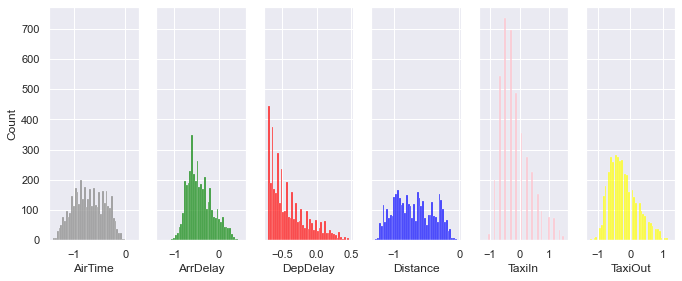

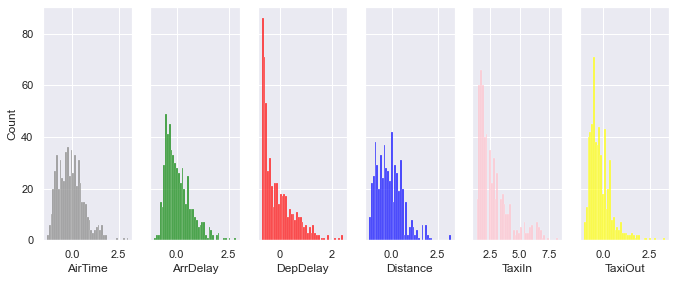

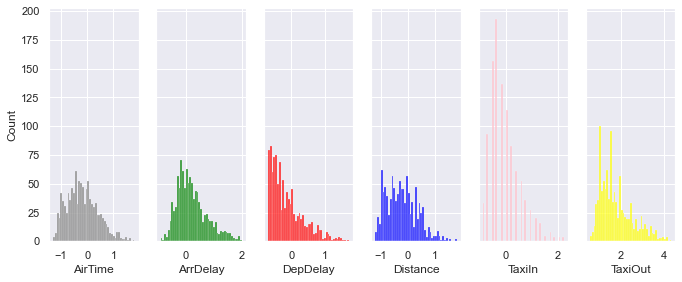

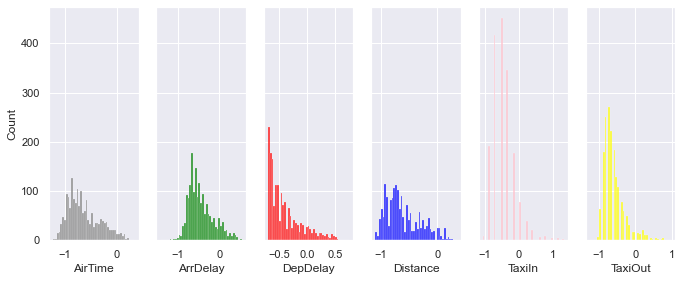

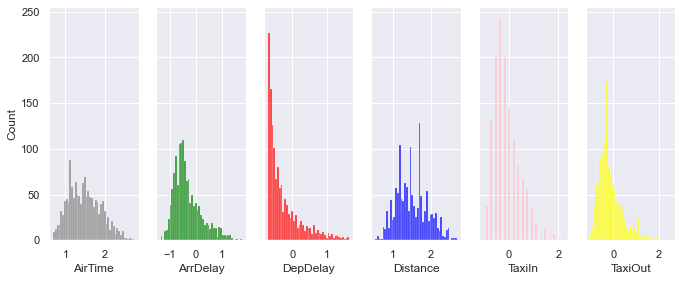

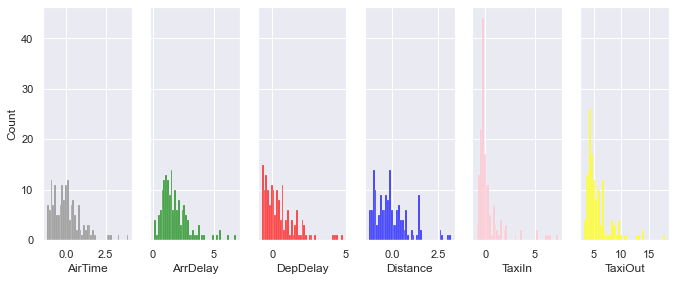

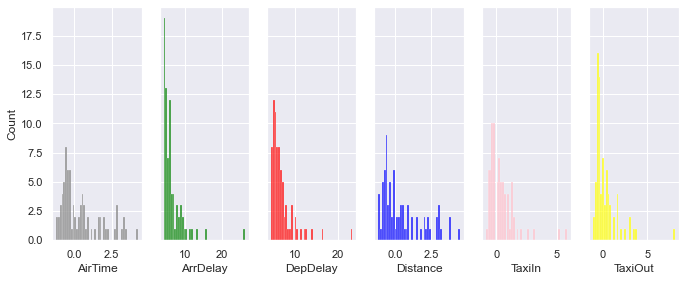

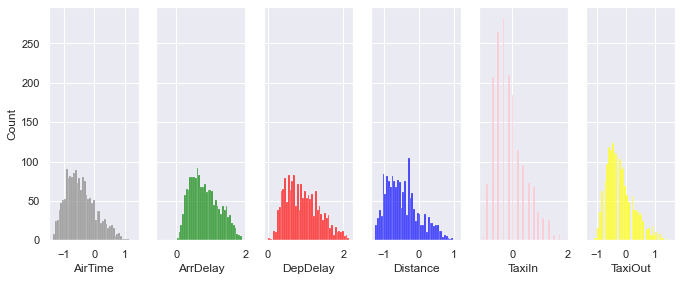

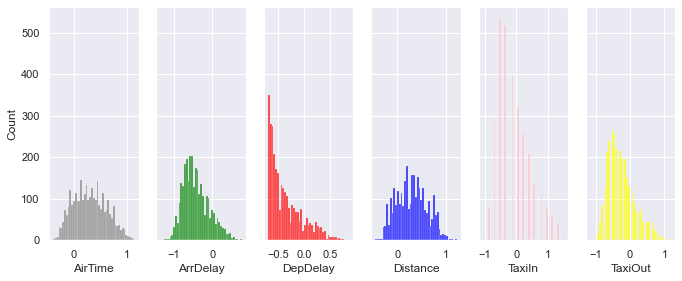

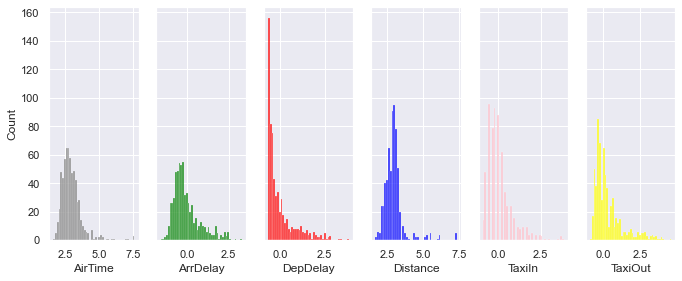

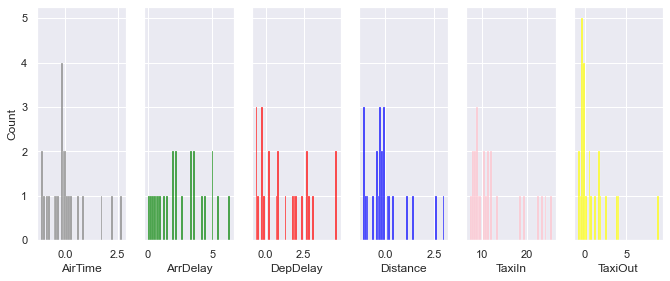

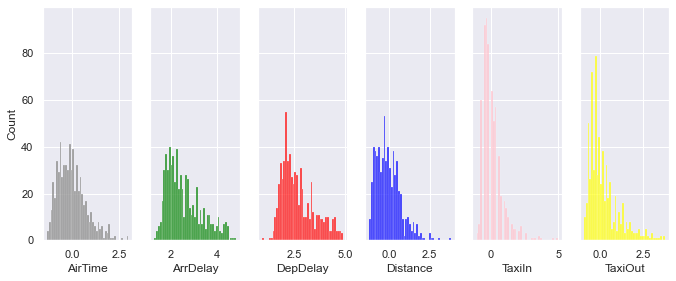

In [47]:
# Histogrames de cada clúster
sns.set(style="darkgrid")

for cluster in range(1,colze.elbow+1):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6, sharey=True,figsize=(10, 4))
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="AirTime",color="grey", ax=ax1 , bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="ArrDelay",color="green", ax=ax2, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="DepDelay",color="red", ax=ax3, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="Distance",color="blue", ax=ax4, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="TaxiIn",color="pink", ax=ax5, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="TaxiOut",color="yellow", ax=ax6, bins=45);

## Nivell 2

- Exercici 2

    Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

In [48]:
# Partim del conjunt de dades mostra.
vols_mostra.head()

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220
5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162
437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844
440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959
6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959


In [49]:
# Transformem les columnes categóriques a freqüència
vols_mostra_clustering_jerarquic = vols_mostra.copy()
columnes_categoriques = ['Month','DayOfWeek','UniqueCarrier','Origin','Dest']

for categoria in columnes_categoriques:
    columnes_a_frequencia = (vols_mostra_clustering_jerarquic.groupby(categoria).size()) / len(vols_mostra_clustering_jerarquic)
    vols_mostra_clustering_jerarquic[categoria] = vols_mostra_clustering_jerarquic[categoria].apply(lambda x : columnes_a_frequencia[x])

In [50]:
vols_mostra_clustering_jerarquic.head()

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
6440972,0.051267,0.129333,0.051867,1.670608,1.125759,-0.209022,0.029800,0.009200,1.486121,-0.148767,5.849220
5237060,0.047533,0.156067,0.038667,-0.274366,-0.618211,-0.682159,0.022000,0.013933,-0.406635,0.582155,0.342162
437002,0.095400,0.144600,0.038667,-0.479100,0.104039,0.037009,0.001667,0.017800,-0.476672,-0.331498,0.985844
440799,0.095400,0.144600,0.038667,-0.215871,-0.195430,-0.360426,0.009733,0.018600,-0.135241,0.216694,-0.086959
6114745,0.051267,0.156067,0.065867,-0.888568,0.562052,0.642625,0.003533,0.056533,-1.021212,2.044000,-0.086959


In [51]:
# Apliquem l'ACP i determinem el nombre de components per a un 95% de la variancia explicada
clustering_jerarquic_acp = PCA(n_components = 0.95, random_state = 56789)
clustering_jerarquic_acp.fit(vols_mostra_clustering_jerarquic)
clustering_jerarquic_acp_components = clustering_jerarquic_acp.n_components_

vols_mostra_clustering_jerarquic_acp = clustering_jerarquic_acp.transform(vols_mostra_clustering_jerarquic)
display(vols_mostra_clustering_jerarquic.head())
display(vols_mostra_clustering_jerarquic.shape)

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
6440972,0.051267,0.129333,0.051867,1.670608,1.125759,-0.209022,0.029800,0.009200,1.486121,-0.148767,5.849220
5237060,0.047533,0.156067,0.038667,-0.274366,-0.618211,-0.682159,0.022000,0.013933,-0.406635,0.582155,0.342162
437002,0.095400,0.144600,0.038667,-0.479100,0.104039,0.037009,0.001667,0.017800,-0.476672,-0.331498,0.985844
440799,0.095400,0.144600,0.038667,-0.215871,-0.195430,-0.360426,0.009733,0.018600,-0.135241,0.216694,-0.086959
6114745,0.051267,0.156067,0.065867,-0.888568,0.562052,0.642625,0.003533,0.056533,-1.021212,2.044000,-0.086959


(15000, 11)

In [52]:
# Percentatge de variància explicada acumulada de les dues primeres components
print (clustering_jerarquic_acp_components)
sum(clustering_jerarquic_acp.explained_variance_ratio_[:2])

4


0.6769403973981944

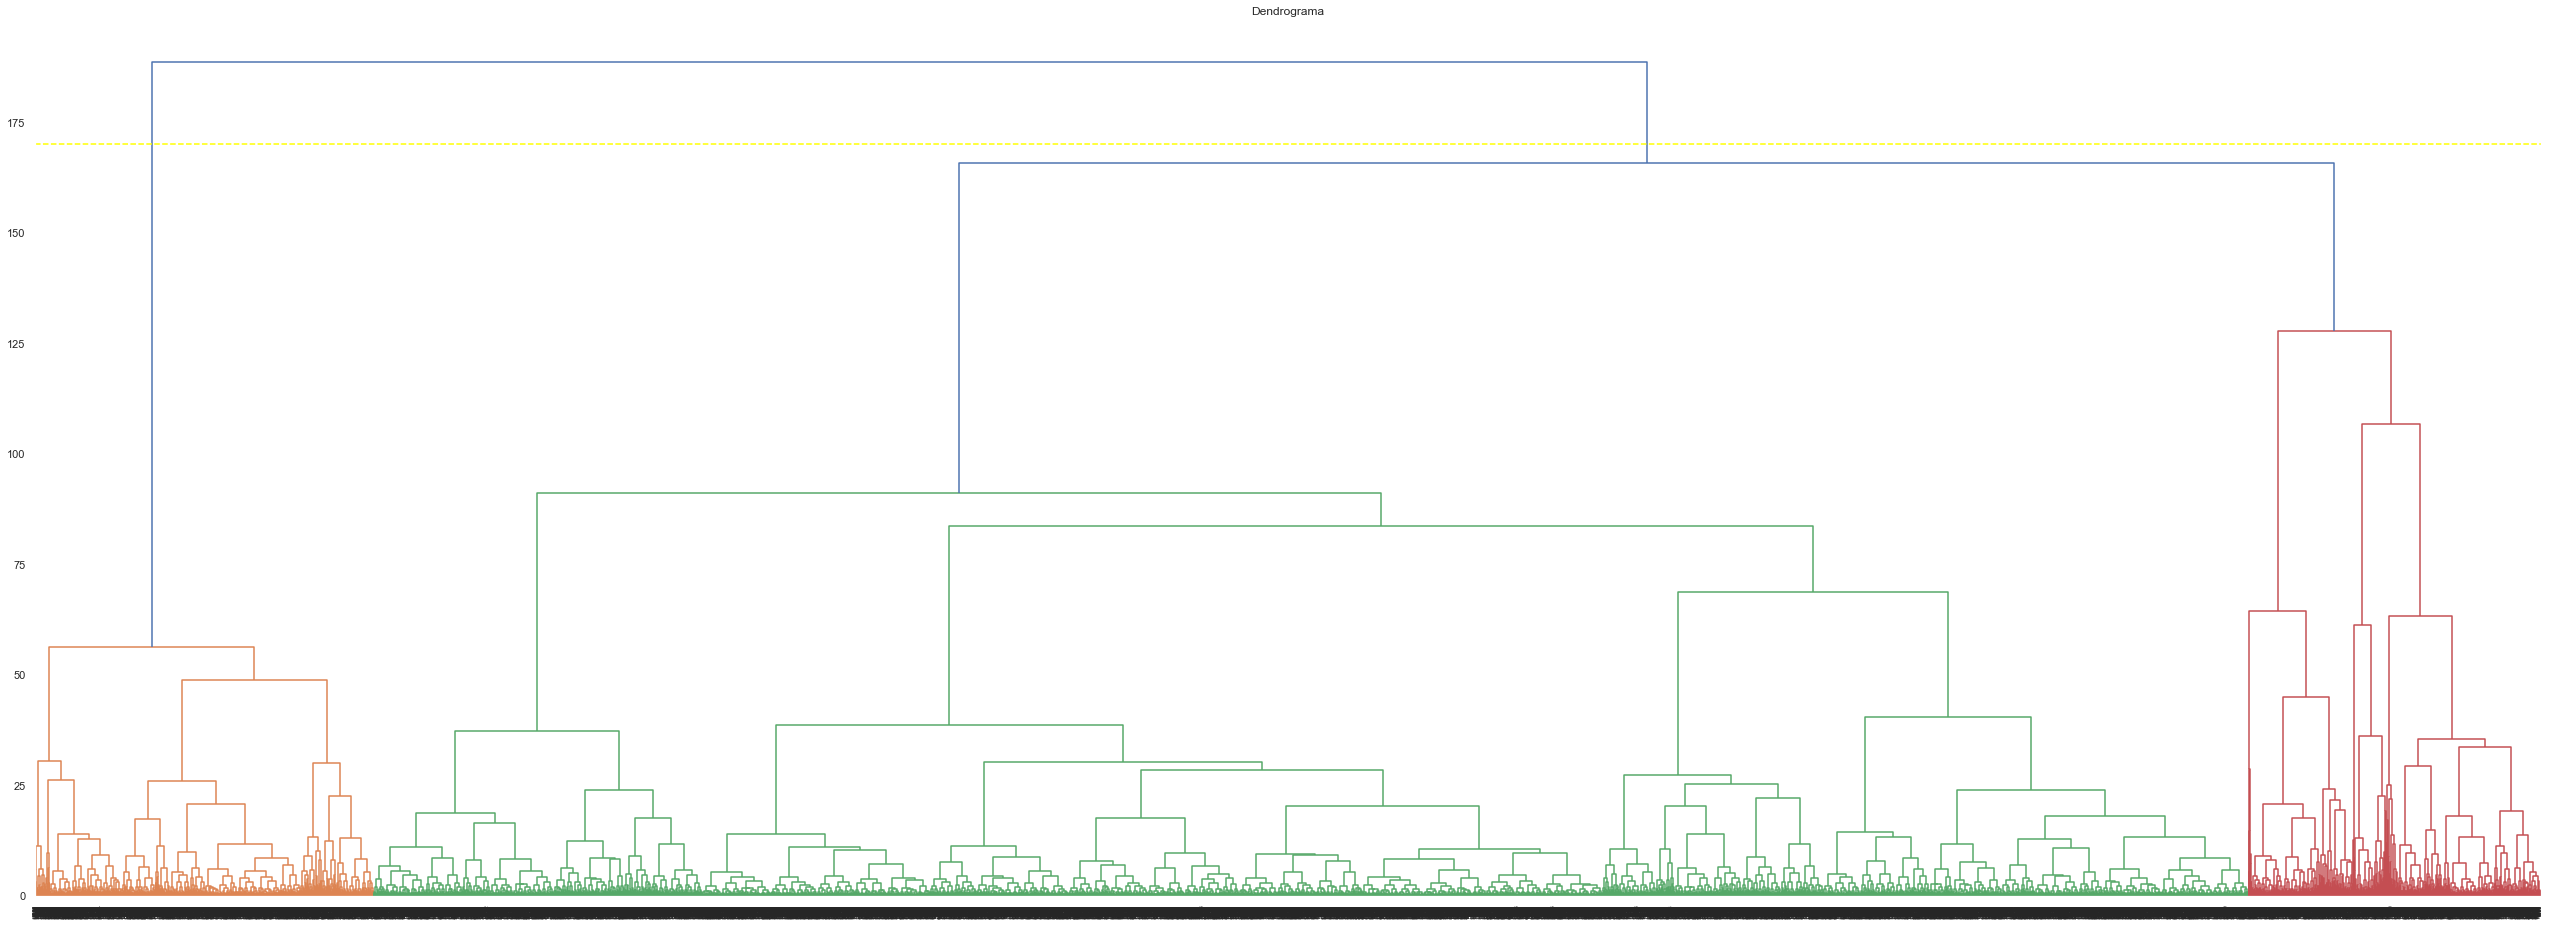

In [53]:
# Grafiquem el dendrograma
plt.figure(figsize=(40, 15))  
plt.title("Dendrograma")  
dendrograma = shc.dendrogram(shc.linkage(vols_mostra_clustering_jerarquic_acp, method='ward'))

# La branca més llarga implica un tall en el punt 170, resultant en un nombre de 2 clusters
plt.axhline(y=170, color='yellow', linestyle='--')

In [54]:
# Ús del Clustering Aglomeratiu
cluster_aglomeratiu = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward') 
cluster_aglomeratiu.fit(vols_mostra_clustering_jerarquic_acp)

AgglomerativeClustering(n_clusters=9)

,acp_component_01,acp_component_02,cluster
0,3.151789,-1.426957,1
1,-0.767057,0.002163,7
2,-0.020529,0.677310,6
3,-0.415964,0.029816,7
4,0.457903,1.597314,8


(15000, 3)

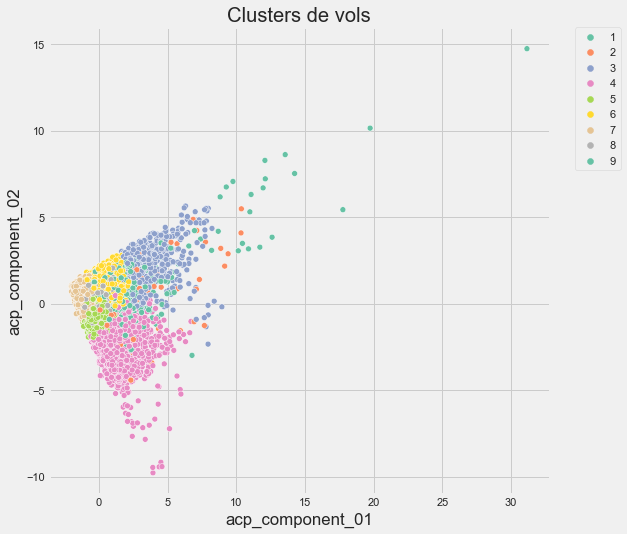

In [55]:
# Ens quedem amb les 2 components principals
clustering_jerarquic_acp_dendrograma = pd.DataFrame(vols_mostra_clustering_jerarquic_acp[:,:2], columns=["acp_component_01", "acp_component_02"], )

clustering_jerarquic_acp_dendrograma["cluster"] = (cluster_aglomeratiu.labels_)+1
display(clustering_jerarquic_acp_dendrograma.head())
display(clustering_jerarquic_acp_dendrograma.shape)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(x="acp_component_01", y="acp_component_02", s=35, data=clustering_jerarquic_acp_dendrograma, hue="cluster", palette="Set2", )

scat.set_title("Clusters de vols")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.0)

plt.show()

In [56]:
# Creem un nou índex per tal de poder concatenar els ACP i clusters
display(vols_mostra.head())
vols_mostra_clustering_jerarquic_final = vols_mostra.reset_index('id')
display(vols_mostra_clustering_jerarquic_final.head())
display(vols_mostra_clustering_jerarquic_final.shape)

,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
id,,,,,,,,,,,
6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220
5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162
437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844
440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959
6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959


,id,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220
1,5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162
2,437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844
3,440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959
4,6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959


(15000, 12)

In [57]:
# Materialització de la unió de taules
vols_mostra_clustering_jerarquic_final = vols_mostra_clustering_jerarquic_final.join(clustering_jerarquic_acp_dendrograma)
display(vols_mostra_clustering_jerarquic_final.head())
display(vols_mostra_clustering_jerarquic_final.shape)

,id,Month,DayOfWeek,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
0,6440972,November,Tuesday,CO,1.670608,1.125759,-0.209022,IAH,SMF,1.486121,-0.148767,5.849220,3.151789,-1.426957,1
1,5237060,September,Thursday,NW,-0.274366,-0.618211,-0.682159,DTW,MSP,-0.406635,0.582155,0.342162,-0.767057,0.002163,7
2,437002,January,Sunday,NW,-0.479100,0.104039,0.037009,ALB,DTW,-0.476672,-0.331498,0.985844,-0.020529,0.677310,6
3,440799,January,Sunday,NW,-0.215871,-0.195430,-0.360426,MEM,MCO,-0.135241,0.216694,-0.086959,-0.415964,0.029816,7
4,6114745,November,Thursday,OO,-0.888568,0.562052,0.642625,IND,ORD,-1.021212,2.044000,-0.086959,0.457903,1.597314,8


(15000, 15)

In [58]:
# Faig cop d'ull als estadístics de cada clúster
for cluster in range(1,9+1):
    display(vols_mostra_clustering_jerarquic_final[vols_mostra_clustering_jerarquic_final['cluster'] == cluster].describe())

,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,9.220000e+02,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.0
mean,3.295473e+06,-0.154282,0.788364,0.229877,-0.210584,0.070034,2.657572,1.225701,0.672320,1.0
std,2.055931e+06,0.786282,0.946878,0.842854,0.753321,0.871389,1.872286,1.420286,1.089910,0.0
min,8.086000e+03,-1.341908,-0.776754,-0.701085,-1.233075,-0.879690,0.270642,-0.914549,-3.012651,1.0
25%,1.560339e+06,-0.800825,0.121655,-0.417202,-0.854436,-0.514228,1.486486,0.193364,0.077885,1.0
50%,3.189412e+06,-0.332862,0.553244,-0.010304,-0.404884,-0.148767,2.130168,1.031083,0.821401,1.0
75%,4.791954e+06,0.354460,1.319534,0.713596,0.321752,0.216694,3.131451,1.963115,1.337418,1.0
max,7.007924e+06,3.937307,9.581373,8.118193,3.160012,7.343189,17.936139,12.110835,7.213405,1.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,3.558182e+06,0.219482,0.574559,0.156335,0.219726,5.338634,0.093987,1.643622,0.001862,2.0
std,2.161399e+06,0.819711,1.446731,1.266704,0.873209,3.644586,1.013706,2.100494,1.455727,0.0
min,9.390600e+04,-1.371156,-1.058608,-0.701085,-1.201558,2.226731,-0.873682,-0.730382,-4.420034,2.0
25%,1.656525e+06,-0.259742,-0.283510,-0.568606,-0.342288,3.323115,-0.444560,0.379568,-0.845056,2.0
50%,3.543018e+06,0.149726,0.060000,-0.379351,0.082750,4.236768,-0.158479,1.002591,-0.136248,2.0
75%,5.418352e+06,0.672529,0.760230,0.358743,0.577388,6.064074,0.270642,1.978889,0.832258,2.0
max,7.006535e+06,3.030627,7.995945,8.118193,3.196781,25.616252,8.924590,10.370038,5.479748,2.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,6.080000e+02,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.0
mean,3.341484e+06,-0.059434,2.884071,3.095406,-0.085696,0.094373,0.072903,3.465884,2.102127,3.0
std,2.016987e+06,0.765393,1.111284,1.169099,0.774281,0.755516,0.859594,1.477929,1.189166,0.0
min,4.461000e+03,-1.341908,1.301918,1.305017,-1.233075,-1.062420,-1.088242,1.382187,-2.338519,3.0
25%,1.540494e+06,-0.610715,2.059400,2.232366,-0.629879,-0.331498,-0.516080,2.400069,1.300277,3.0
50%,3.402170e+06,-0.157375,2.605492,2.762280,-0.203527,-0.148767,-0.158479,3.009662,2.155034,3.0
75%,4.688589e+06,0.354460,3.451053,3.708554,0.329631,0.399425,0.342162,4.197804,2.817579,3.0
max,6.977679e+06,4.259032,7.009457,7.663981,4.452199,4.967691,5.348579,8.953602,5.642050,3.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,2.026000e+03,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000,2026.0
mean,3.425233e+06,1.933397,-0.153834,-0.105548,1.953160,0.052453,0.027629,1.124106,-2.501737,4.0
std,2.038808e+06,0.888020,0.734411,0.721527,0.882636,0.714660,0.730120,1.091062,1.168393,0.0
min,8.280000e+02,-0.259742,-1.622315,-0.701085,-0.298077,-1.062420,-1.016722,-0.574166,-9.776042,4.0
25%,1.686056e+06,1.290387,-0.635827,-0.606457,1.327662,-0.514228,-0.444560,0.333540,-3.237719,4.0
50%,3.349754e+06,1.743727,-0.353973,-0.398277,1.733003,-0.148767,-0.158479,0.878009,-2.345874,4.0
75%,5.046475e+06,2.460296,0.121655,0.112711,2.568197,0.216694,0.270642,1.610271,-1.780831,4.0
max,7.008893e+06,7.593272,3.856218,4.049213,7.356994,3.871307,4.633376,6.702559,1.167885,4.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,2.547000e+03,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.000000,2547.0
mean,3.356584e+06,0.366156,-0.364092,-0.341983,0.359627,-0.179402,-0.046524,-0.223851,-0.691049,5.0
std,2.084893e+06,0.355430,0.360301,0.334928,0.354617,0.408492,0.618689,0.456551,0.491994,0.0
min,8.490000e+02,-0.698458,-1.340461,-0.701085,-0.805847,-1.062420,-1.159763,-1.206241,-2.145010,5.0
25%,1.554228e+06,0.135102,-0.635827,-0.606457,0.148410,-0.514228,-0.516080,-0.553011,-1.028746,5.0
50%,3.206050e+06,0.369084,-0.406821,-0.436128,0.381284,-0.331498,-0.230000,-0.306180,-0.692345,5.0
75%,5.060082e+06,0.610378,-0.142583,-0.171171,0.589645,0.033964,0.270642,0.042395,-0.353267,5.0
max,7.007178e+06,1.495121,0.879137,0.983284,1.479118,1.313078,2.058648,1.485644,0.769973,5.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.967000e+03,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.0
mean,3.309803e+06,-0.482758,0.667747,0.759651,-0.490449,-0.247889,-0.222109,0.404354,1.074737,6.0
std,2.106158e+06,0.428943,0.500054,0.531896,0.416589,0.452919,0.468354,0.694781,0.614587,0.0
min,7.900000e+01,-1.400404,-0.459668,-0.379351,-1.276848,-1.062420,-1.231283,-0.895208,-0.494858,6.0
25%,1.432400e+06,-0.800825,0.262582,0.339817,-0.818979,-0.514228,-0.587601,-0.163417,0.621236,6.0
50%,3.229744e+06,-0.537596,0.614899,0.680476,-0.548461,-0.331498,-0.301520,0.277479,1.078989,6.0
75%,4.966993e+06,-0.215871,1.011256,1.134688,-0.231542,0.033964,0.056081,0.951136,1.502748,6.0
max,7.007424e+06,0.910167,2.200327,2.459472,0.834775,1.861270,1.558006,2.331167,2.825306,6.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,5.392000e+03,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.000000,5392.0
mean,3.254464e+06,-0.616492,-0.488127,-0.449255,-0.599646,-0.334649,-0.355001,-1.102355,0.425710,7.0
std,2.026513e+06,0.367355,0.246124,0.225519,0.358065,0.370790,0.400259,0.355064,0.492206,0.0
min,1.000000e+01,-1.400404,-1.410925,-0.701085,-1.276848,-1.245151,-1.231283,-1.998540,-1.130663,7.0
25%,1.473148e+06,-0.903192,-0.671059,-0.625383,-0.891643,-0.514228,-0.659121,-1.369874,0.069524,7.0
50%,3.119504e+06,-0.669210,-0.530132,-0.511830,-0.650015,-0.331498,-0.444560,-1.112450,0.486860,7.0
75%,4.884272e+06,-0.347485,-0.336357,-0.322575,-0.306832,-0.148767,-0.158479,-0.853474,0.788613,7.0
max,7.005944e+06,0.603066,0.544436,0.585849,0.528362,1.313078,1.343446,0.200573,1.634645,7.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.322000e+03,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.0
mean,3.376580e+06,-0.341556,-0.160492,-0.221534,-0.366050,1.094686,-0.079223,-0.257636,0.313552,8.0
std,2.064210e+06,0.471599,0.449681,0.445138,0.474118,0.668417,0.577469,0.592704,0.675316,0.0
min,8.078000e+03,-1.283413,-1.305230,-0.701085,-1.252335,-0.148767,-1.088242,-1.547935,-1.401898,8.0
25%,1.556582e+06,-0.727706,-0.512516,-0.587532,-0.744127,0.582155,-0.516080,-0.704959,-0.151849,8.0
50%,3.322006e+06,-0.376733,-0.248278,-0.379351,-0.429397,0.947617,-0.230000,-0.332360,0.395932,8.0
75%,5.011075e+06,0.003487,0.156887,0.074860,-0.000419,1.495809,0.270642,0.106474,0.785333,8.0
max,7.009031e+06,1.041782,1.601387,1.664601,1.027378,3.688576,1.915607,1.638455,2.221487,8.0


,id,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,acp_component_01,acp_component_02,cluster
count,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0
mean,3.550332e+06,0.629571,10.900360,11.291761,0.698093,0.365163,0.306402,13.485128,6.645204,9.0
std,1.947494e+06,1.238659,4.627889,3.973870,1.276968,0.746647,1.119012,5.546898,2.978950,0.0
min,5.279500e+05,-0.917816,7.485085,7.436875,-0.854873,-0.696959,-0.516080,8.825152,3.052296,9.0
25%,1.699683e+06,-0.482756,8.480381,9.007691,-0.523072,-0.148767,-0.337280,10.701983,4.938969,9.0
50%,3.483386e+06,0.420267,9.123360,10.029667,0.522234,0.033964,-0.051199,11.833731,6.499314,9.0
75%,5.243020e+06,1.707167,11.549945,12.376428,1.874828,1.038982,0.413683,13.729864,7.711065,9.0
max,6.293132e+06,2.899012,26.122666,23.315360,3.053205,1.495809,3.775133,31.150991,14.735597,9.0


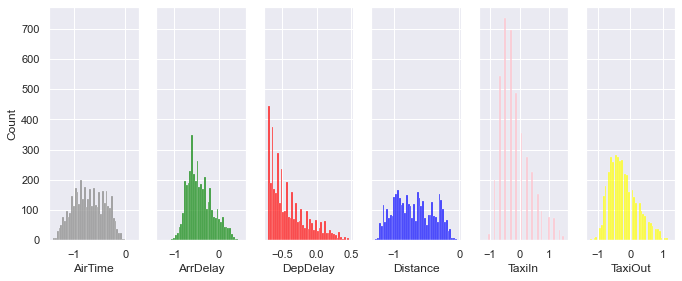

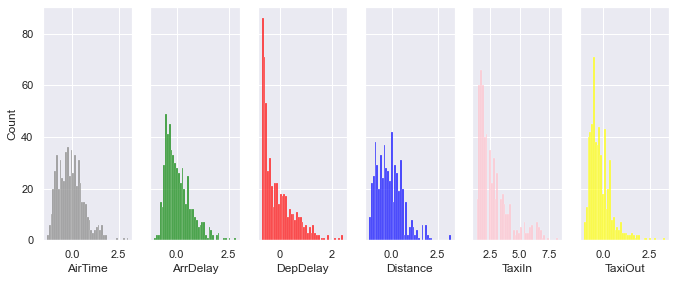

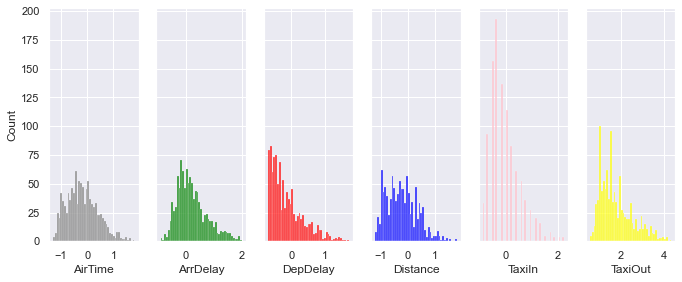

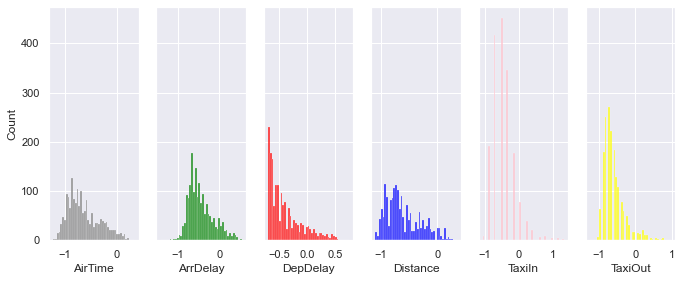

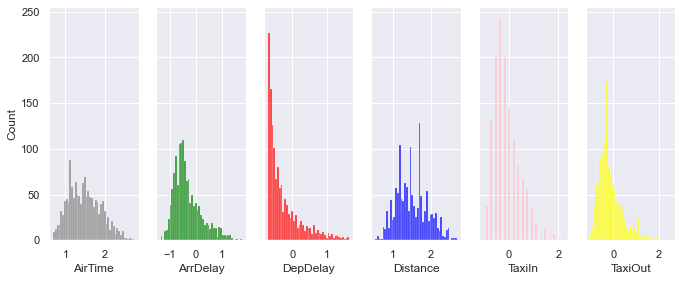

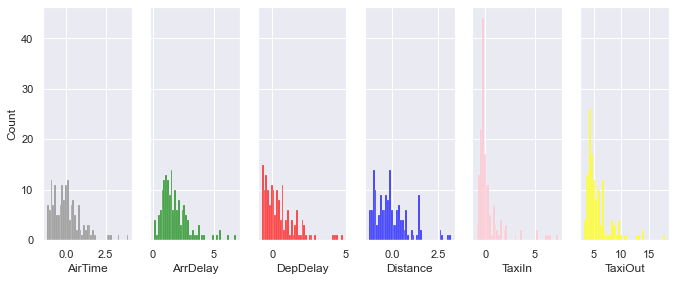

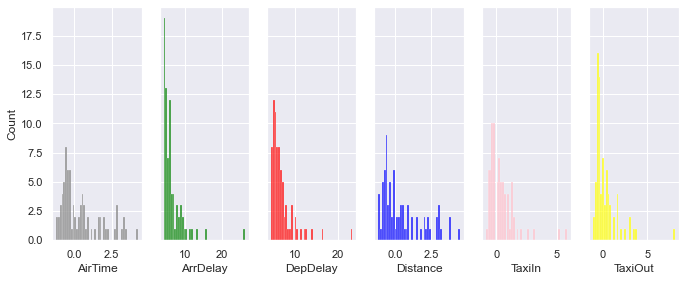

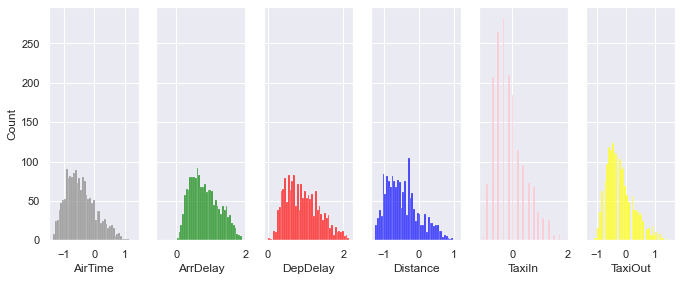

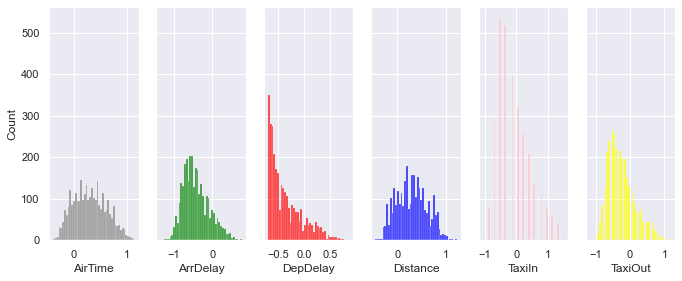

In [59]:
# Histogrames de cada clúster
sns.set(style="darkgrid")

for cluster in range(1,9+1):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(ncols=6, sharey=True,figsize=(10, 4))
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="AirTime",color="grey", ax=ax1 , bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="ArrDelay",color="green", ax=ax2, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="DepDelay",color="red", ax=ax3, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="Distance",color="blue", ax=ax4, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="TaxiIn",color="pink", ax=ax5, bins=45)
    sns.histplot(data=vols_mostra_final[vols_mostra_final['cluster'] == cluster], x="TaxiOut",color="yellow", ax=ax6, bins=45);

## Nivell 3

- Exercici 3

    Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [60]:
# Cálculo del coeficiente silueta para cada algoritmo
acp_x_components_kmeans_silhouette = silhouette_score(vols_mostra_dummies_acp_x_components, vols_mostra_dummies_acp_x_components_kmeans.labels_).round(2)
cluster_aglomeratiu_silhouette = silhouette_score(vols_mostra_clustering_jerarquic_acp, cluster_aglomeratiu.labels_).round(2)
print('Coeficient de silueta K-means: ', acp_x_components_kmeans_silhouette)
print('Coeficient de silueta Clúster jeràrquic aglomeratiu: ', cluster_aglomeratiu_silhouette)
# Aquests resultats mostren que el clúster aglomeratiu conglomera millor el conjunt de dades

Coeficient de silueta K-means:  0.06
Coeficient de silueta Clúster jeràrquic aglomeratiu:  0.22
